<a href="https://colab.research.google.com/github/aliceczr/chocolate_statistics/blob/main/chocolate_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatísticas de Redes sociais

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### Carregamento de Dados


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
csv_1 = pd.read_csv('/content/drive/MyDrive/datasets/chocolate.csv')

In [4]:
csv_1.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


## Análise das Medidas Estatísticas e a Análise de Correlação

As análises de medidas de estatísticas só podem ser feitas em colunas númericas, portanto as colunas em foco agora serão **'cocoa_percent'** e **'rating'**

In [57]:
nulos_rating = csv_1['rating'].isnull().any()
print(f"Há valores nulos na coluna 'rating': {nulos_rating}")

# Verificando se há valores nulos na coluna 'cocoa_percent'
nulos_cocoa_percent = csv_1['cocoa_percent'].isnull().any()
print(f"Há valores nulos na coluna 'cocoa_percent': {nulos_cocoa_percent}")

Há valores nulos na coluna 'rating': False
Há valores nulos na coluna 'cocoa_percent': False


In [16]:
mean_rating = csv_1['rating'].mean()
median_rating = csv_1['rating'].median()
mode_rating = csv_1['rating'].mode()[0]

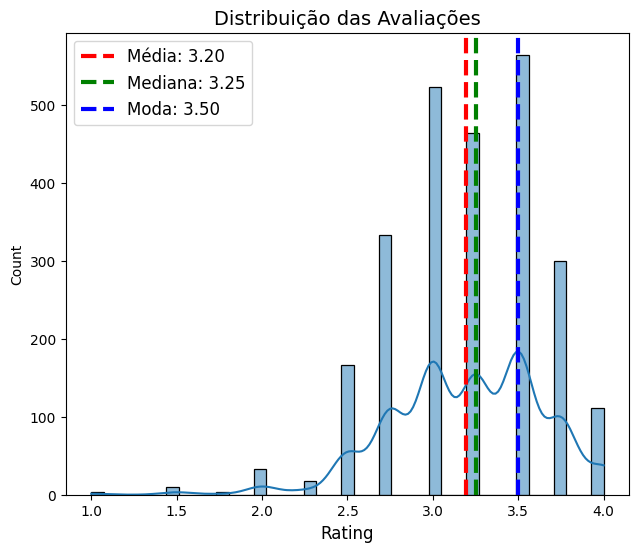

In [30]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(csv_1['rating'], kde=True)
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=3, label=f'Média: {mean_rating:.2f}')
plt.axvline(median_rating, color='green', linestyle='dashed', linewidth=3, label=f'Mediana: {median_rating:.2f}')
plt.axvline(mode_rating, color='blue', linestyle='dashed', linewidth=3, label=f'Moda: {mode_rating:.2f}')
plt.title('Distribuição das Avaliações', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.legend(fontsize=12)


In [19]:
# Remover o símbolo '%' e converter para números
csv_1['cocoa_percent'] = csv_1['cocoa_percent'].str.replace('%', '').astype(float)

mean_cocoa_percent = csv_1['cocoa_percent'].mean()
median_cocoa_percent = csv_1['cocoa_percent'].median()
mode_cocoa_percent = csv_1['cocoa_percent'].mode()[0]

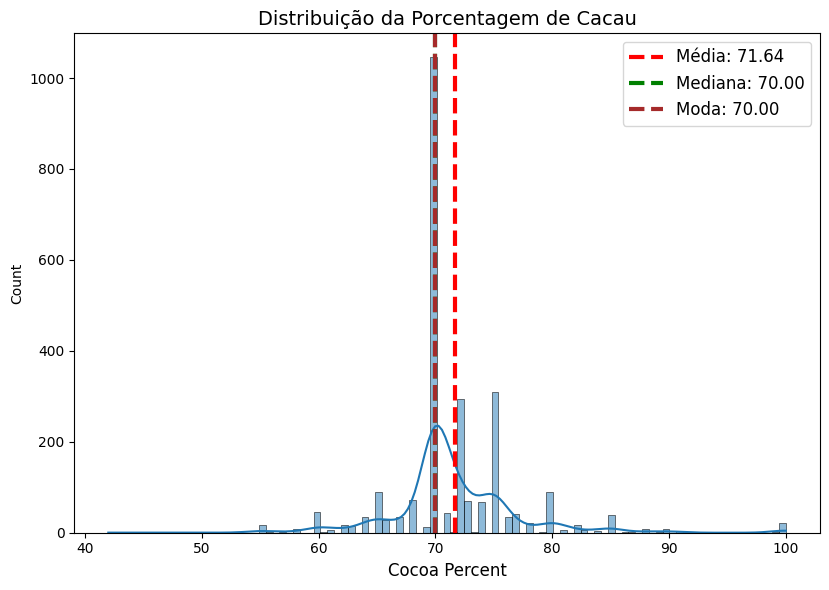

In [35]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 2)
sns.histplot(csv_1['cocoa_percent'], kde=True)
plt.axvline(mean_cocoa_percent, color='red', linestyle='dashed', linewidth=3, label=f'Média: {mean_cocoa_percent:.2f}')
plt.axvline(median_cocoa_percent, color='green', linestyle='dashed', linewidth=3, label=f'Mediana: {median_cocoa_percent:.2f}')
plt.axvline(mode_cocoa_percent, color='brown', linestyle='dashed', linewidth=3, label=f'Moda: {mode_cocoa_percent:.2f}')
plt.title('Distribuição da Porcentagem de Cacau', fontsize=14)
plt.xlabel('Cocoa Percent', fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

Agora iremos fazer um gráfico boxplot das variáveis que estamos analisando p


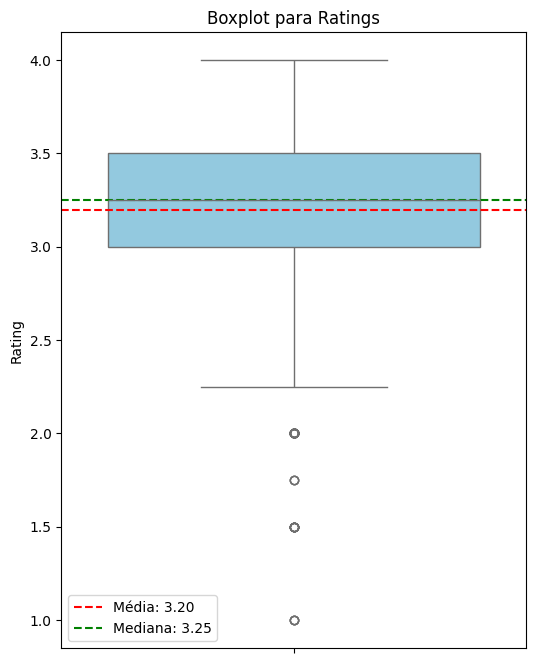

In [43]:
# 'rating'
plt.figure(figsize=(6, 8))
sns.boxplot(y='rating', data=csv_1, color='skyblue')
plt.axhline(mean_rating, color='red', linestyle='--', label=f'Média: {mean_rating:.2f}')
plt.axhline(median_rating, color='green', linestyle='--', label=f'Mediana: {median_rating:.2f}')
plt.title('Boxplot para Ratings')
plt.ylabel('Rating')
plt.legend()
plt.show()

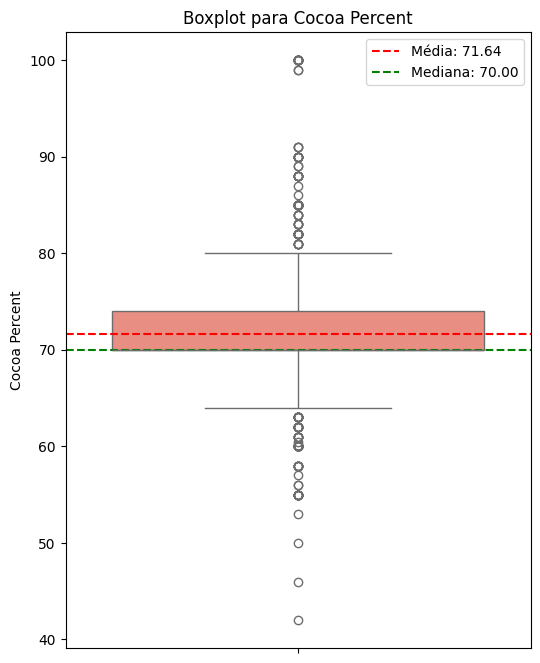

In [44]:
# 'cocoa_percent'
plt.figure(figsize=(6, 8))
sns.boxplot(y='cocoa_percent', data=csv_1, color='salmon')
plt.axhline(mean_cocoa_percent, color='red', linestyle='--', label=f'Média: {mean_cocoa_percent:.2f}')
plt.axhline(median_cocoa_percent, color='green', linestyle='--', label=f'Mediana: {median_cocoa_percent:.2f}')
plt.title('Boxplot para Cocoa Percent')
plt.ylabel('Cocoa Percent')
plt.legend()
plt.show()

Agora iremos olhar a coorelação entre as colunas

In [52]:
col_num = csv_1.drop(columns=['ref', 'review_date'])

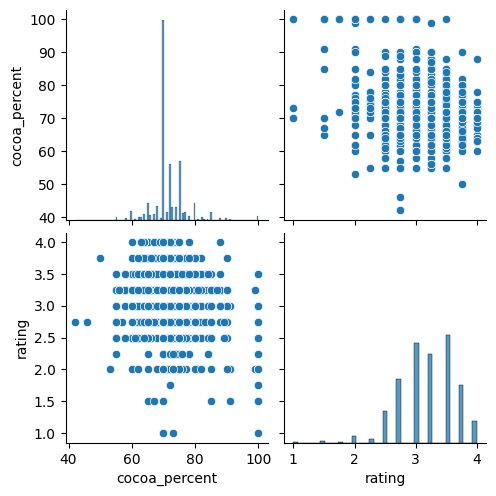

In [53]:
sns.pairplot(col_num)

O código abaixo nos mostra que a coorelação entre rating e cocoa_percente é uma relação negativa e fraca.

In [55]:
correlation = csv_1['rating'].corr(csv_1['cocoa_percent'])
print(f"A correlação entre 'cocoa_percent' e 'rating' é: {correlation:.2f}")

A correlação entre 'cocoa_percent' e 'rating' é: -0.15


## Ánalise CSV


### Histograma dos anos que foram feitos review

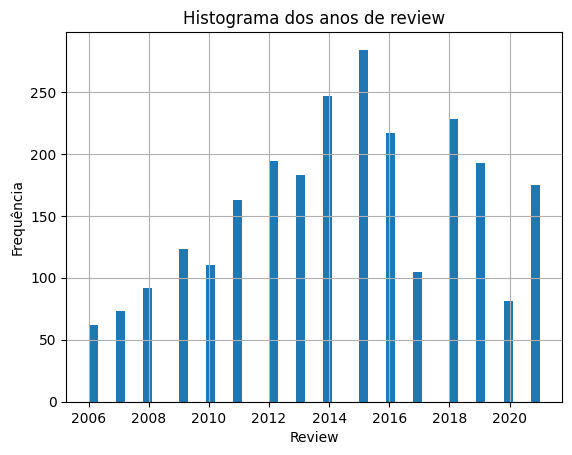

In [5]:
csv_1['review_date'].hist(bins=50)

plt.title('Histograma dos anos de review')
plt.xlabel('Review')
plt.ylabel('Frequência')
plt.show()

O ano que mais aparece com frequência no nosso dataset é o de 2015. Na sequência iremos ver quantas reviews foram feitas no ano em questão


In [6]:
ano_especifico = 2015

avaliacoes_ano_especifico = csv_1[csv_1['review_date'] == ano_especifico]

# Contando o número de avaliações no ano específico
total_avaliacoes_ano_especifico = len(avaliacoes_ano_especifico)

print(f'O total de avaliações em {ano_especifico} foi de {total_avaliacoes_ano_especifico}.')

O total de avaliações em 2015 foi de 284.


E agora analisar a quantidade de reviews em cada ano


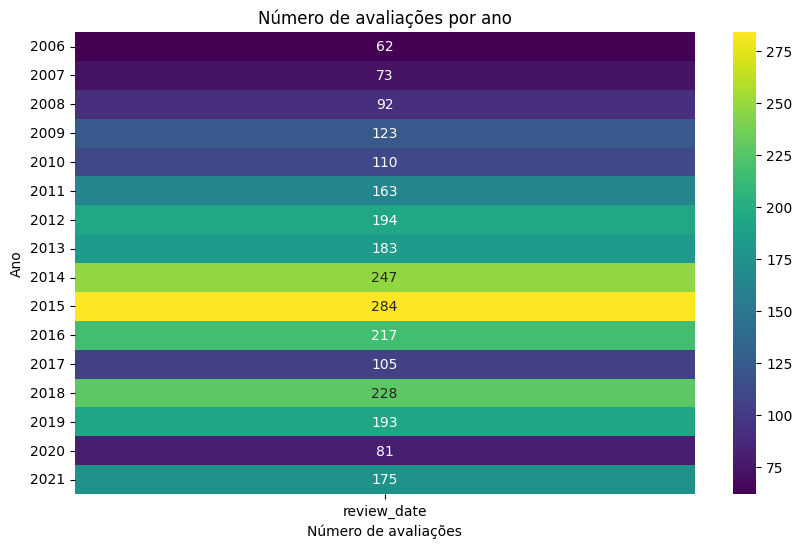

In [7]:
avaliacoes_por_ano = csv_1['review_date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.heatmap(data=pd.DataFrame(avaliacoes_por_ano), cmap='viridis', annot=True, fmt='g')
plt.title('Número de avaliações por ano')
plt.xlabel('Número de avaliações')
plt.ylabel('Ano')
plt.show()

Passando agora a olhar mais para alguns outros aspectos do dataset, iremos olhar quais países tiveram mais reviews


<ipython-input-59-a1b20d51329b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avaliacoes_por_pais.values, y=avaliacoes_por_pais.index, palette='viridis')


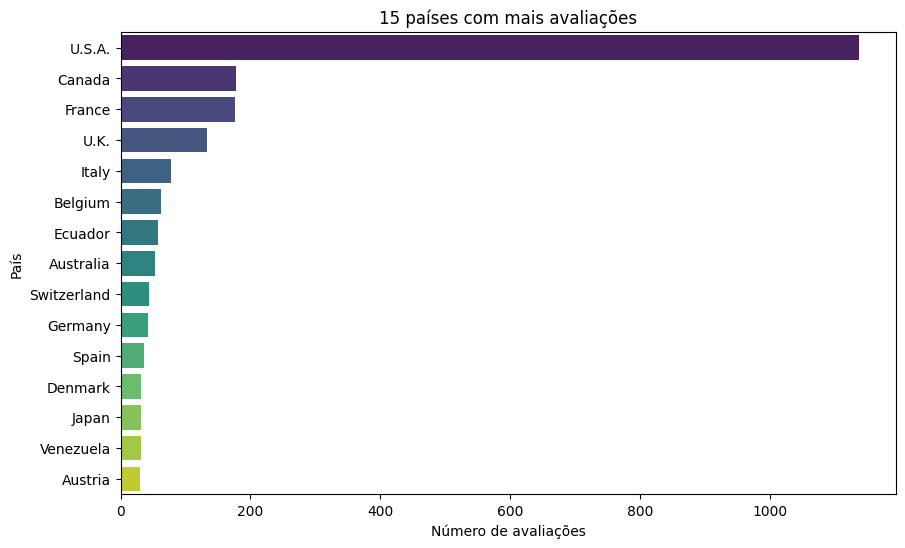

In [59]:
avaliacoes_por_pais = csv_1.groupby('company_location')['review_date'].count().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=avaliacoes_por_pais.values, y=avaliacoes_por_pais.index, palette='viridis')
plt.title('15 países com mais avaliações')
plt.xlabel('Número de avaliações')
plt.ylabel('País')

# Definindo rótulos personalizados para o eixo y
plt.yticks(range(len(avaliacoes_por_pais)), avaliacoes_por_pais.index)

plt.show()


No gráfico abaixo estamos vendo os paises de origem dos grãos, e qual foi o mais recorrente entre eles


<ipython-input-82-176de3cd7694>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


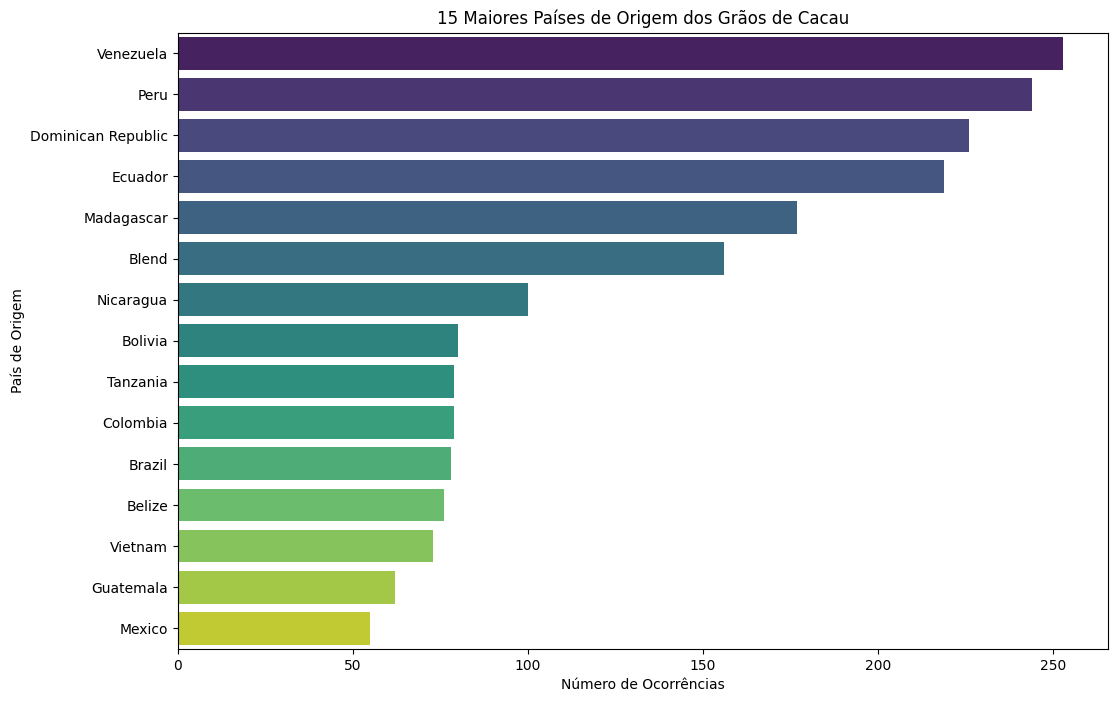

In [82]:

top_countries = csv_1['country_of_bean_origin'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('15 Maiores Países de Origem dos Grãos de Cacau')
plt.xlabel('Número de Ocorrências')
plt.ylabel('País de Origem')
plt.show()


E após a análise de qual foi o mais recorrente, iremos olhar as maiores 10 companhias e quais grãos eles mais utilizaram (os 10 maiores também)

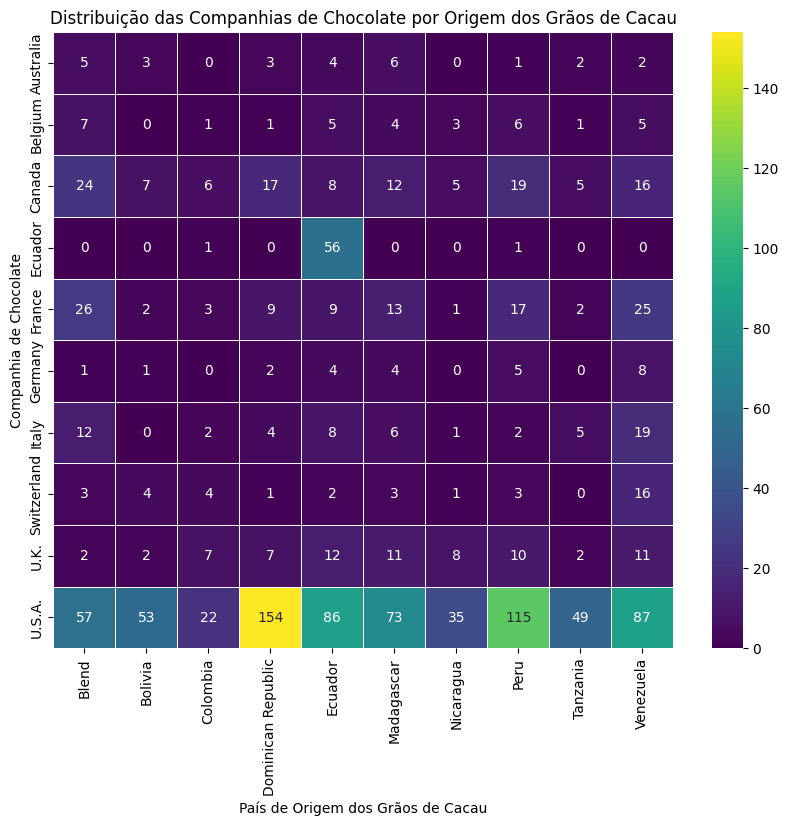

In [77]:
top_companies = csv_1['company_location'].value_counts().nlargest(10).index

top_origins = csv_1['country_of_bean_origin'].value_counts().nlargest(10).index

df_filtered = csv_1[(csv_1['company_location'].isin(top_companies)) & (csv_1['country_of_bean_origin'].isin(top_origins))]

heatmap_data = df_filtered.groupby(['company_location', 'country_of_bean_origin']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Distribuição das Companhias de Chocolate por Origem dos Grãos de Cacau')
plt.xlabel('País de Origem dos Grãos de Cacau')
plt.ylabel('Companhia de Chocolate')
plt.show()

Agora estamos analisando a média da nota dada para cada porcentagem de cacau

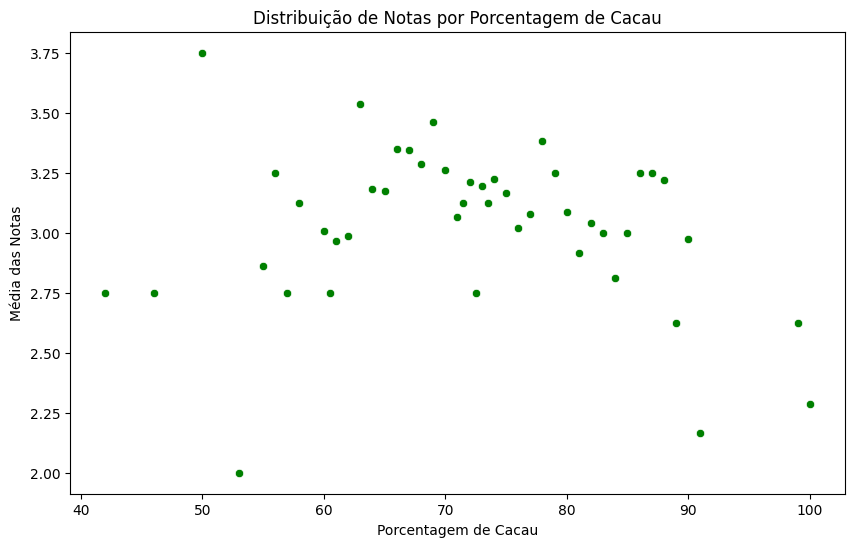

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rating_by_cocoa_percent.index, y=rating_by_cocoa_percent.values, color='green')
plt.title('Distribuição de Notas por Porcentagem de Cacau')
plt.xlabel('Porcentagem de Cacau')
plt.ylabel('Média das Notas')
plt.show()

Características mais memoráveis

<ipython-input-94-761f8cf37230>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=memorable_characteristics_counts.values, y=memorable_characteristics_counts.index, palette='magma')


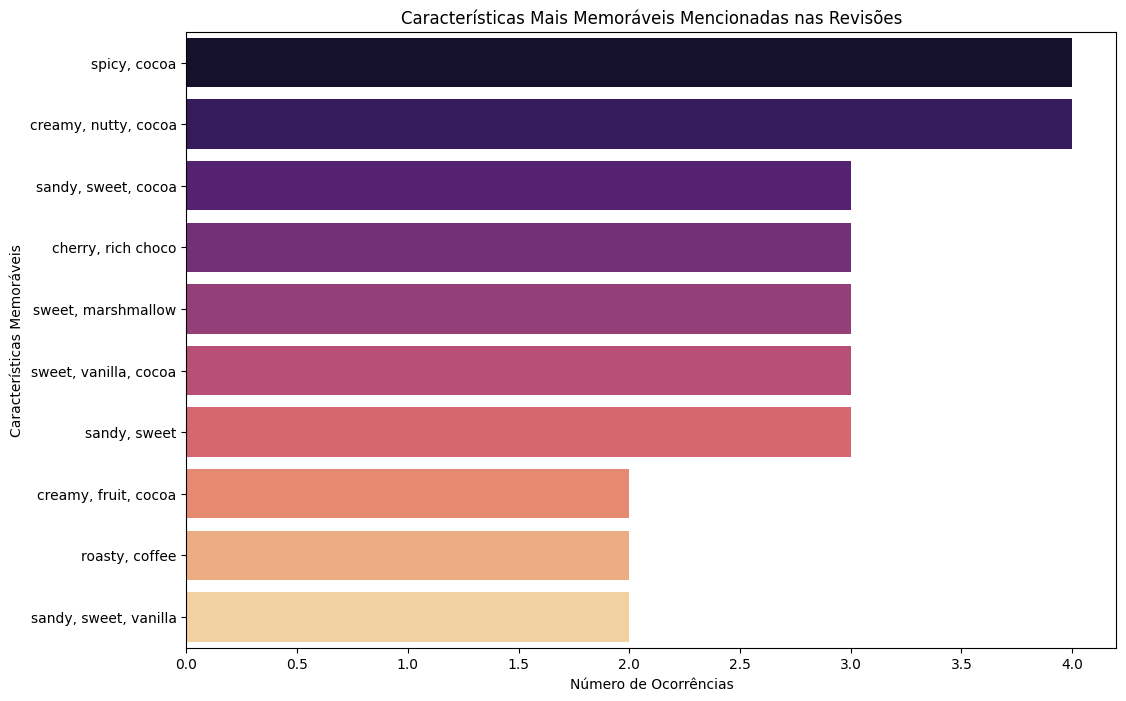

In [94]:

memorable_characteristics_counts = csv_1['most_memorable_characteristics'].value_counts().nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=memorable_characteristics_counts.values, y=memorable_characteristics_counts.index, palette='magma')
plt.title('Características Mais Memoráveis Mencionadas nas Revisões')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Características Memoráveis')
plt.show()

E a nota média das 10 maiores caraterísticas memoráveis

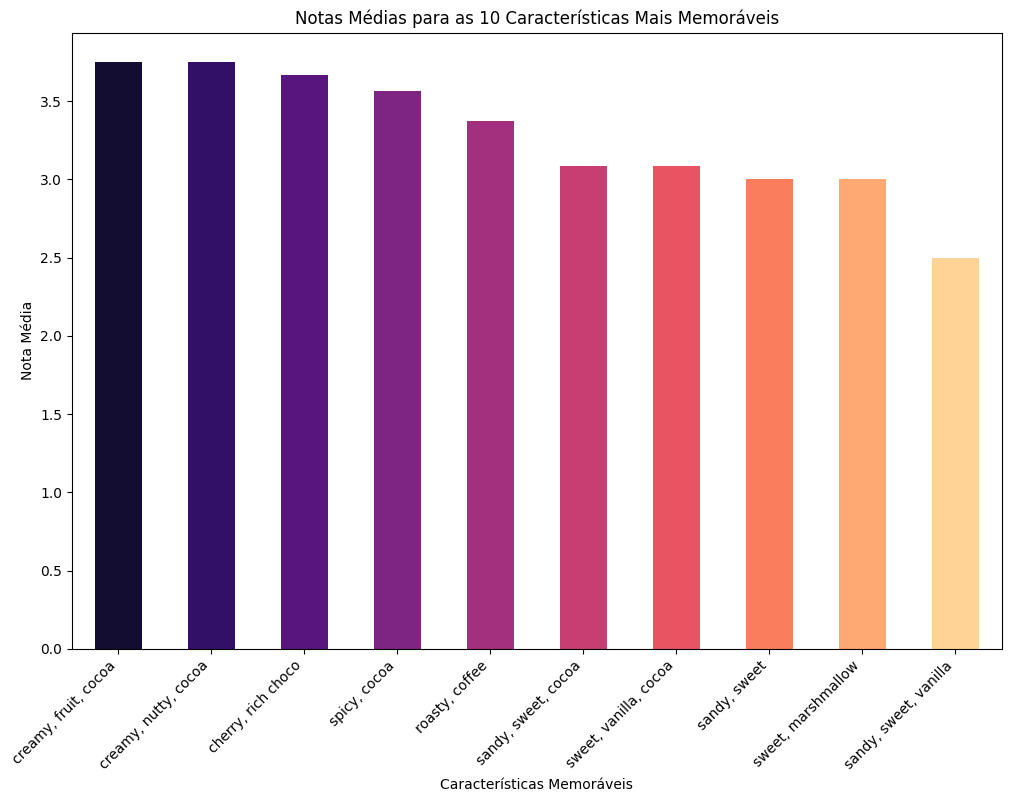

In [100]:

top10_memorable_characteristics = csv_1['most_memorable_characteristics'].value_counts().nlargest(10).index


filtered_data = csv_1[csv_1['most_memorable_characteristics'].isin(top10_memorable_characteristics)]


mean_ratings = filtered_data.groupby('most_memorable_characteristics')['rating'].mean().sort_values(ascending=False)

colors = sns.color_palette("magma", len(mean_ratings))

plt.figure(figsize=(12, 8))
mean_ratings.plot(kind='bar', color=colors)
plt.title('Notas Médias para as 10 Características Mais Memoráveis')
plt.xlabel('Características Memoráveis')
plt.ylabel('Nota Média')
plt.xticks(rotation=45, ha='right')

plt.show()